<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana14/AjusteNolineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.optimize as spo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana14/Data/")
!ls

Exponencial.dat


In [95]:
data = pd.read_csv('Exponencial.dat',sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

sigma = np.random.normal(0,10,len(x))
sigma = np.abs(sigma)
sigma

array([ 2.57108478, 10.25527418,  3.84856494,  8.52900151,  3.54095487,
       13.07520677,  6.07324601,  8.80030331,  3.69487198,  6.08779608,
        6.02917027,  8.83261521, 11.6383969 , 10.78250058, 13.64571787,
        8.53363554,  9.39719813,  6.80381082,  3.25987921,  0.07182722,
       19.43772513,  3.18906991, 16.24308754,  8.34754362,  4.45467575,
        6.81773118,  8.16167298, 16.44803283,  2.934874  ])

Text(0, 0.5, 'y')

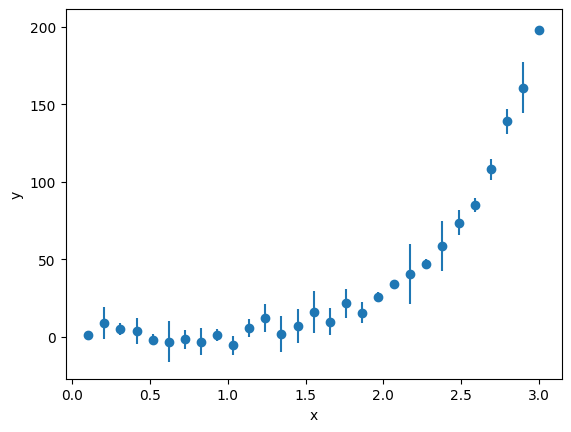

In [96]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [97]:
# Definimos el modelo
def GetModel1(x,p):
  y = p[0]*np.exp(p[1]*x)
  return y

In [98]:
def GetModel2(x,p):
  y = 0
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [99]:
def Chi2(p,x,y,sigma,Model):

  return np.sum( (y - Model(x,p))**2/(sigma**2)   )

In [100]:
nll = lambda *p: Chi2(*p)

In [106]:
p0 =np.array([1.,1.,1])
p0 = np.ones(9)

In [107]:
result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel2) )
result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 8.371755905080825
        x: [-1.713e+00  4.629e+01 -1.365e+02  1.152e+02  5.236e+00
            -4.960e+01  2.562e+01 -5.299e+00  4.150e-01]
      nit: 50
      jac: [ 1.334e-02  6.985e-03  7.122e-03  7.862e-03  1.143e-02
             1.843e-02  4.173e-02  9.332e-02  1.924e-01]
 hess_inv: [[ 9.732e+00 -8.959e+01 ...  2.326e+01 -2.321e+00]
            [-8.959e+01  1.369e+03 ... -5.628e+02  5.729e+01]
            ...
            [ 2.326e+01 -5.628e+02 ...  3.676e+02 -3.843e+01]
            [-2.321e+00  5.729e+01 ... -3.843e+01  4.028e+00]]
     nfev: 942
     njev: 93

In [108]:
params = result.x
t = np.linspace(min(x),max(x),100)
params

array([  -1.71331293,   46.28608938, -136.51648972,  115.19577767,
          5.23577987,  -49.5960962 ,   25.61533897,   -5.29937717,
          0.41502885])

Text(0, 0.5, 'y')

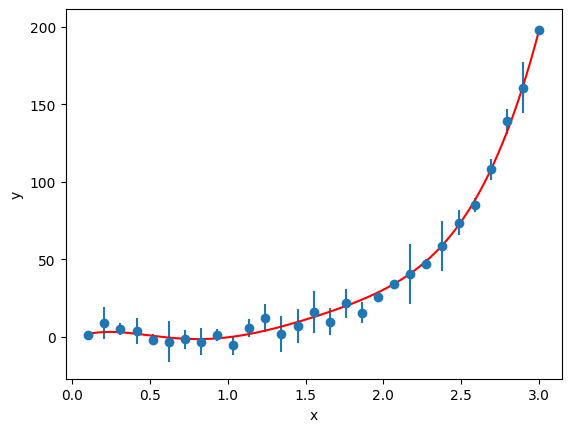

In [109]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(t,GetModel2(t,params),color='r')
plt.xlabel('x')
plt.ylabel('y')